<a href="https://colab.research.google.com/github/Rosharma307/Hotel_booking_analysis/blob/main/Hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyse the data to discover important factors that govern the bookings.

In [ ]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel_df = pd.read_csv("/content/drive/MyDrive/Hotel Bookings.csv")  # reading data from dataset

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df['arrival_date_year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: arrival_date_year, dtype: int64

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Creating a copy of dataframe

df= hotel_df.copy()

In [ ]:
df = hotel_df.copy()
df['arrival_date_year'] = df['arrival_date_year'].astype(int)




In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df["hotel"].unique()  # Return types of hotel

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df["arrival_date_year"].unique() # tells us years of all the bookings [2015-2017]

array([2015, 2016, 2017])

In [ ]:
df['meal'].unique() # tells us about meal plans for guests like BB, FB etc

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df['market_segment'].unique() # diff. group of customers with similar preferences.

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['distribution_channel'].unique() # gives data about ways to book hotel [intermediates between hotel and customers ]

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

#Cleaning data

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \

Remove duplicate rows \
Handling missing values. \
Convert columns to appropriate datatypes. \
Adding impoertant columns

####Step 1: Removing duplicate rows if any





In [ ]:
df[df.duplicated()].shape # Showa no of rows and columns with duplicate values

(31994, 32)

In [ ]:
df.drop_duplicates(inplace = True) # remove the duplicate data and also update the dataset

In [ ]:
df.shape

(87396, 32)

###Step2: Handling missing values.

In [ ]:
 #Columns having missing values.
df.isnull().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


#####Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns.
We will replace null values by 0 in these columns

In [ ]:
df[['company','agent']] = df[['company','agent']].fillna(0)

#####This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.
So, 'nan' values are the missing values due to error of recording data.

We will replace the null values under this column with mean value of children.

In [ ]:
df['children'].fillna(df['children'].mean(), inplace = True)

##### In country column the country name is missing so we can replace it by others.

In [ ]:
df['country'].fillna('others', inplace = True)

In [ ]:
# Checking if all null values are removed
df.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

######There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [ ]:
df[df['adults']+df['babies']+df['children'] == 0].shape

(166, 32)

In [ ]:
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

#####converting datatyes to appropriate data types.

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')
# changing datatype of column 'reservation_status_date' to data_type.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

##### Adding required new columns to daaset

In [ ]:
# Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


Exploratory Data Analysis [EDA]

###### Now we have a clean data lets find some answers from our data.

###### first we have to find the correlation between numerical data .
since columns like is_cancelled,company, agent contains catagorical data we dont have to find correlation between them.

 we have added total_stay and total_people column so we can remove unnecessary columns like adults, children, babies, stay_in_weekend_nights etc because these two columns contains all the info from these columns.





In [ ]:
df1 = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]  # contains all the columns with numerical data

####### Creating a heatmap to easily grasp the correlation.

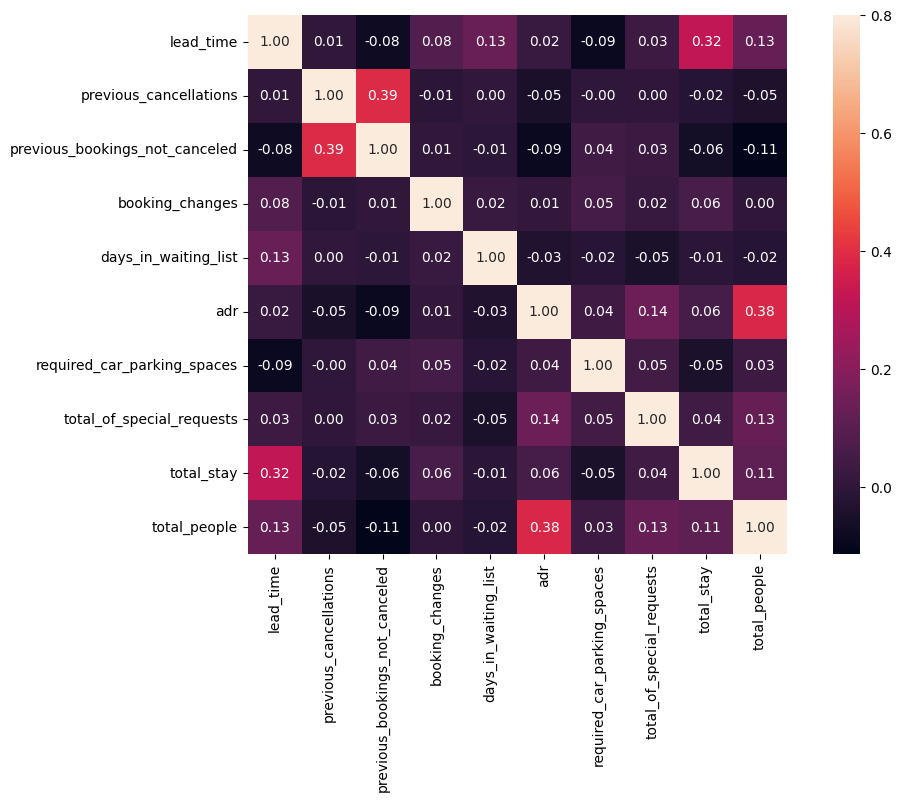

In [ ]:
#correlation matrix
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

##### By studing above heatmap we can say that:
1. there is some correlation between lead_time and total_stay. it means people who stay in hotel for long period plan before arival.
2. similarly in between adr and total_people. it means more the people stays more the revangue generates and more Average day rate gets.

#####check if total stay affects the  ADR

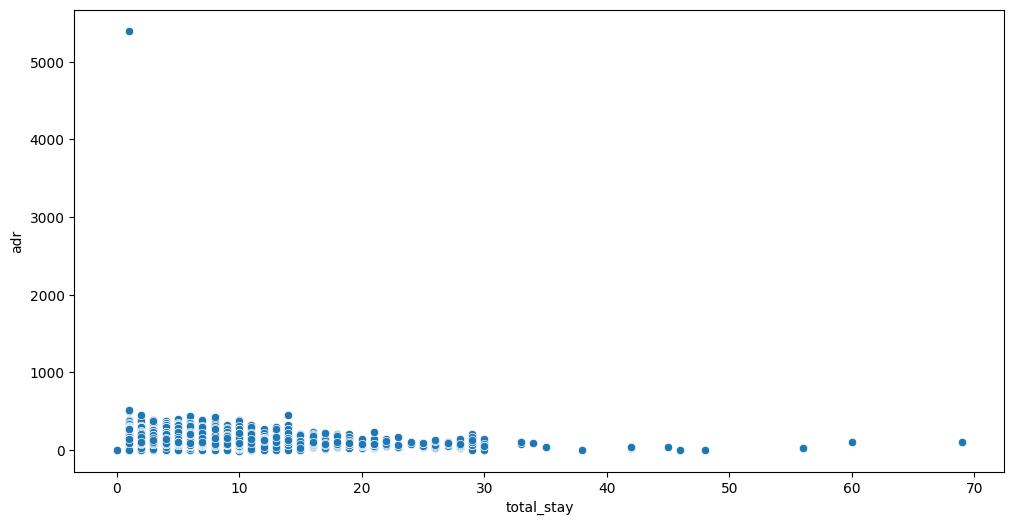

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

##### As we can see there's a outlier so we need to remove it.

<ipython-input-41-9d6e887442ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1[df1['adr'] > 5000].index, inplace = True)


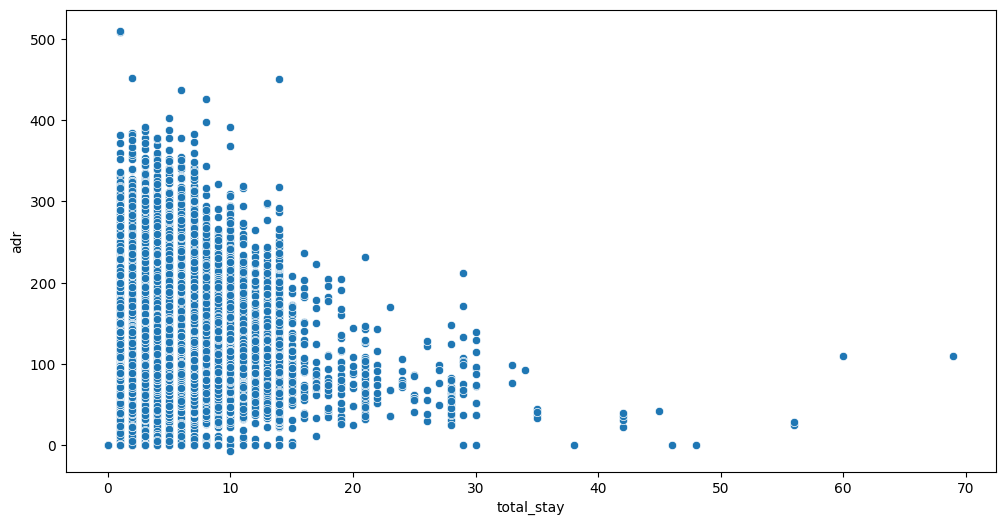

In [ ]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

##### By studing the scatter plot we can say that as the time period of stay increases the ADR decreases. It means for long stay customers can get better deal.

# Lets get Answers for some questions.

##### Which Agent make the highest no. of bookings.

<Axes: xlabel='agent', ylabel='num_of_bookings'>

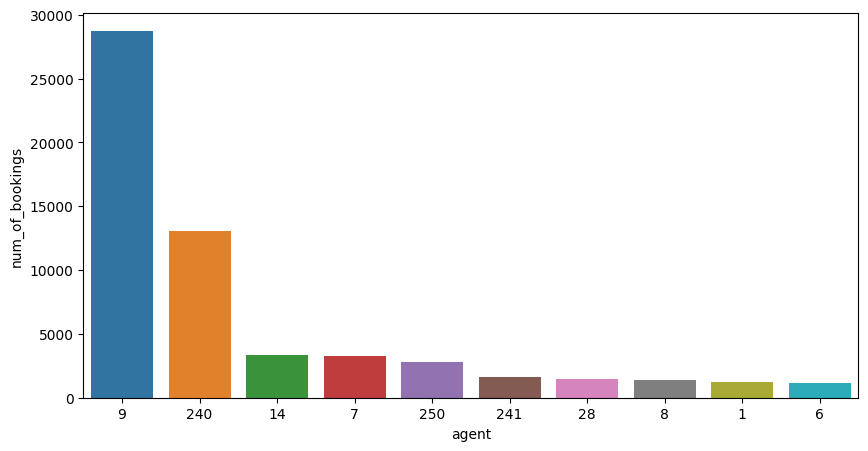

In [ ]:
d1 = pd.DataFrame(df['agent'].value_counts()).reset_index().rename(columns={'index': 'agent', 'agent': 'num_of_bookings'}).sort_values(by='num_of_bookings', ascending=False)
d1.drop(d1[d1['agent'] == 0].index, inplace=True)  # 0 represents that booking is not made by an agent
d1 = d1[:10]  # Selecting top 10 performing agents
plt.figure(figsize=(10, 5))
sns.barplot(x='agent', y='num_of_bookings', data=d1, order=d1.sort_values('num_of_bookings', ascending=False).agent)


###### As we can see agent 9 has the highest bookings.

Q2) Which room type is in most demand ?

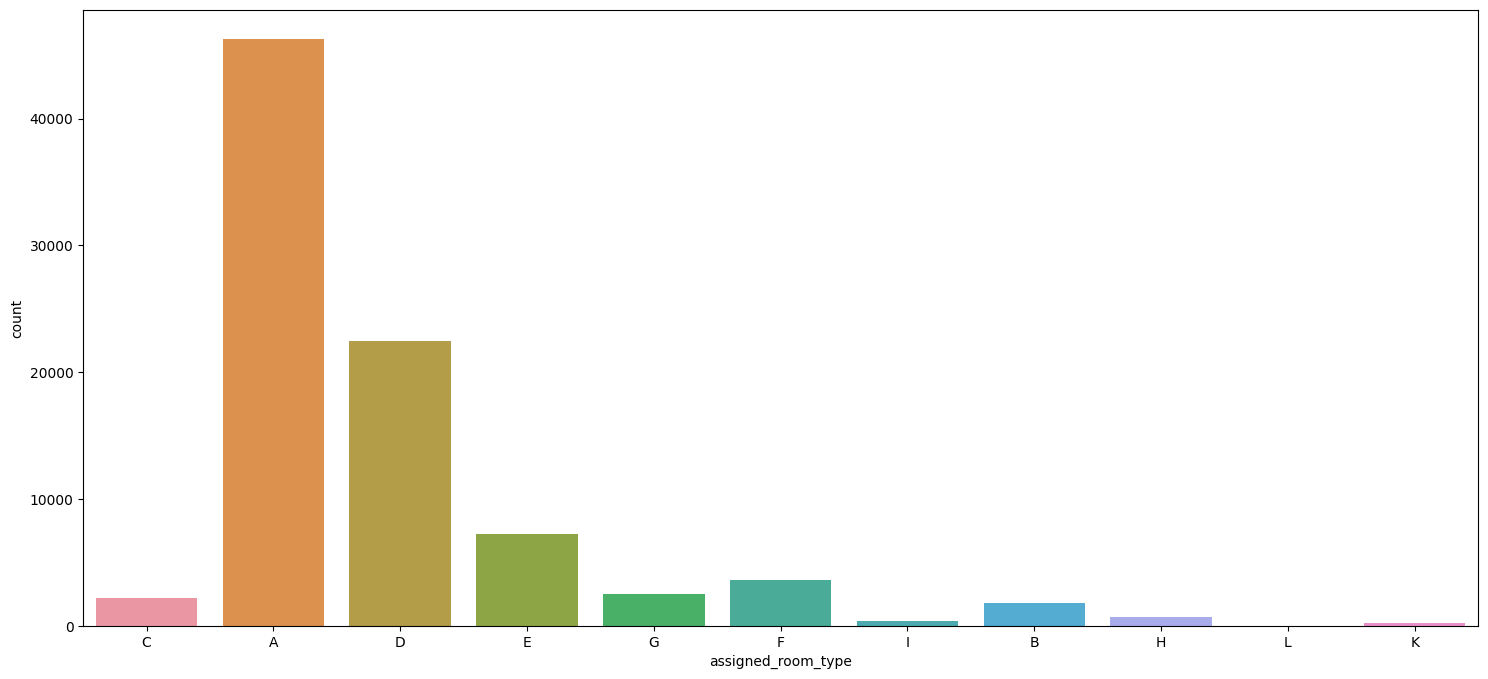

In [ ]:
fig, axes = plt.subplots(1, figsize=(18, 8))

grp_by_room = df.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()
sns.countplot( x = df['assigned_room_type'])
plt.show()

Most demanded room type is A

Let us see from which countries most of the customers visit these hotels?

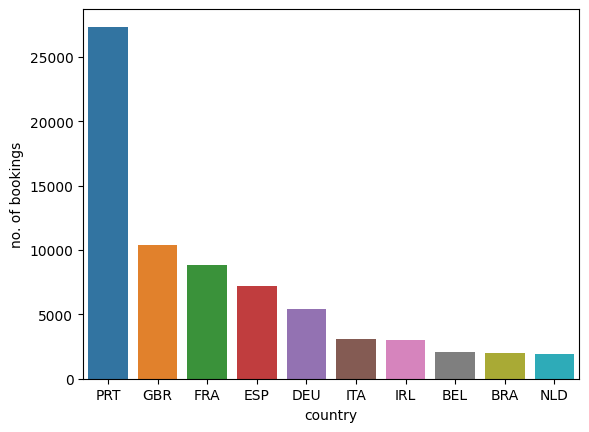

In [ ]:
grp_by_country = df.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2 = d2[:10]
sns.barplot(x = d2.index, y = d2['no. of bookings'])
plt.show()

mostly people come from Portugal and great bretain and france.

#(1) Hotel wise analysis

Q1) What is percentage of bookings in each hotel?

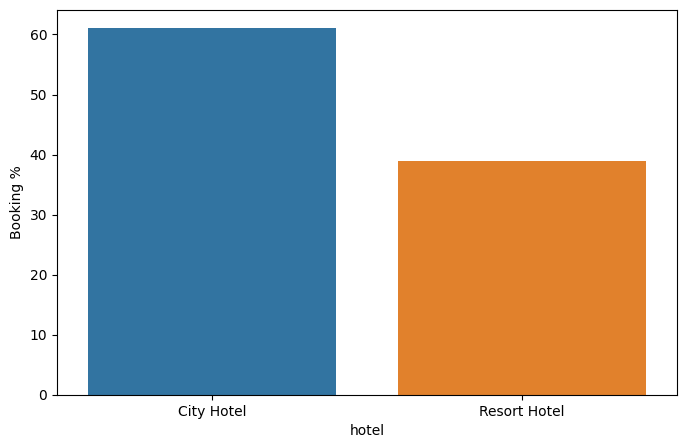

In [ ]:
grouped_by_hotel = df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

City Hotel has almost 20% greater booking then Resort Hotel

Q2) which hotel  make more revenue?

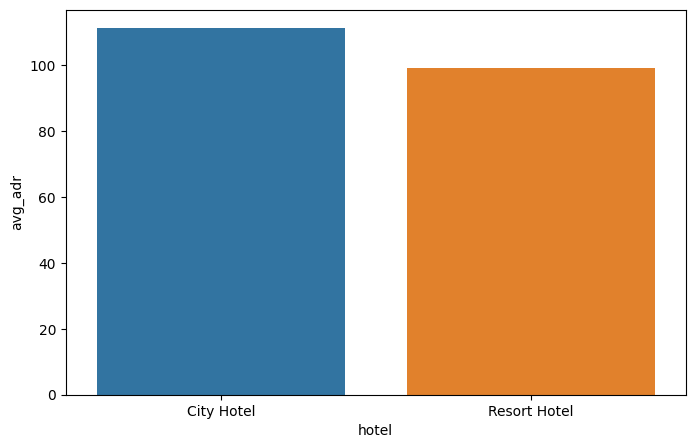

In [ ]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

There is not much difference but City Hotel is making slightly more revanue then Resort Hotel

3) What is preferred stay in each hotel?

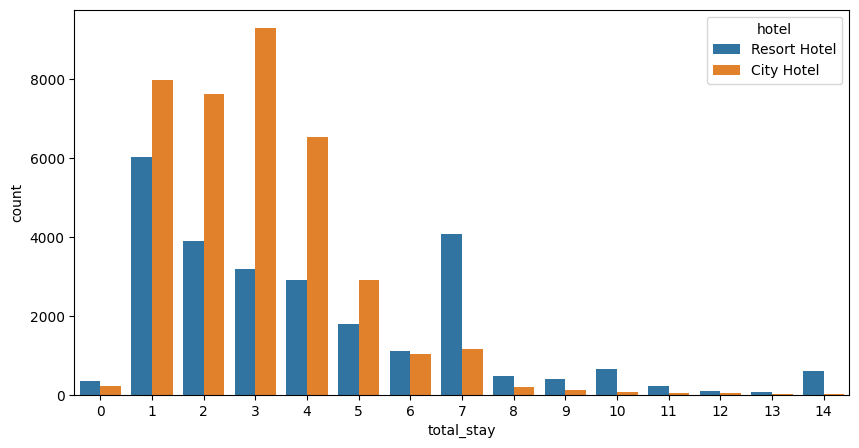

In [ ]:
not_canceled = df[df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()


By the context of above plot for short stay 4-5 days City Hotel is preferred but for long stay more then 5 days Resort Hotel is highly preferred.

Q4) waiting time for each Hotel?

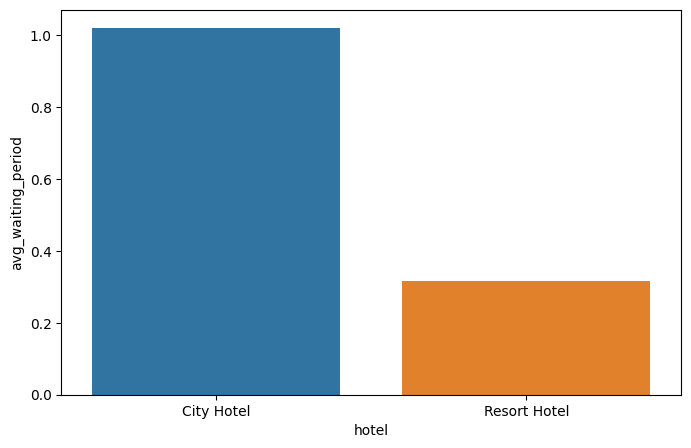

In [ ]:
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

City Hotel has high waiting time as compared to Resort waiting time . It means City hotels are highly occupied .

Q5) Which hotel has higher bookings cancellation rate.

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16035,53274,30.10
Resort Hotel,7974,33956,23.48


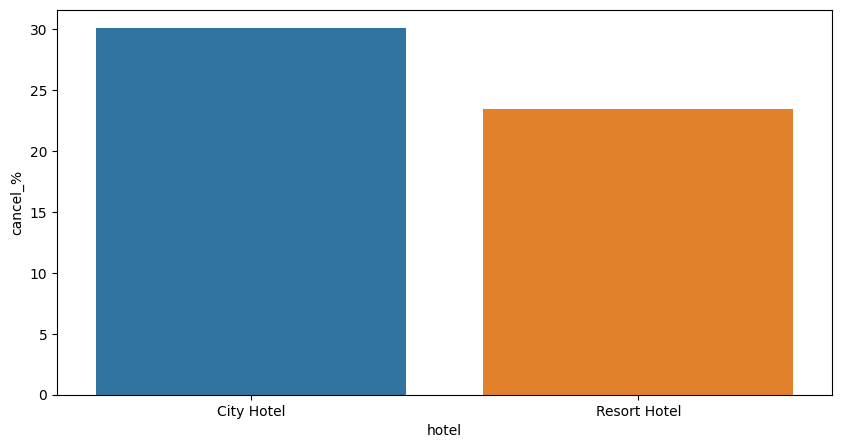

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

City Hotels has almost 30% cancellation rate .

Q6) Which hotel has high chance that its customer will return for another stay?

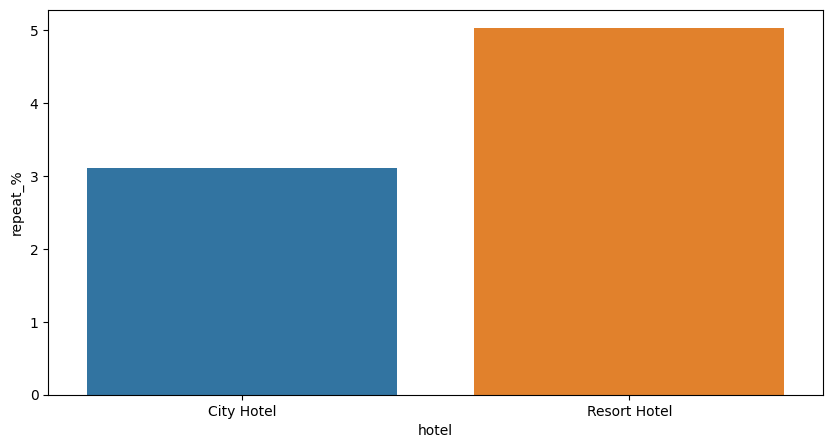

In [ ]:
# Selecting and counting repeated customers bookings
repeated_data = df[df['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

It is ovious that People more Likely to revisit Resort Hotel.

#(2) Distribution Channel wise Analysis

Q2) Which channel is mostly used for early booking of hotels?

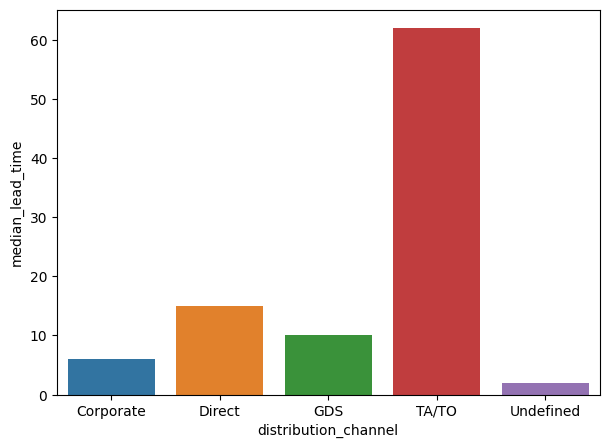

In [ ]:
group_by_dc = df.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

TA/TO are most common method for booking hotel.

 Which distribution channel brings better revenue generating deals for hotels?

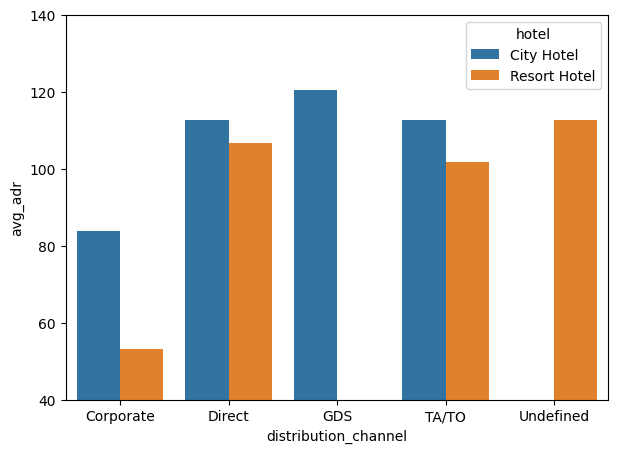

In [ ]:
group_by_dc_hotel = df.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

for city hotels GDS generates most revenue but TA/TO and Direct also makes a high revenue.
AS for Resort hotel Direct and TA/TO are high revanue factor.  

Which Distribution channel has higher cancellation rate?

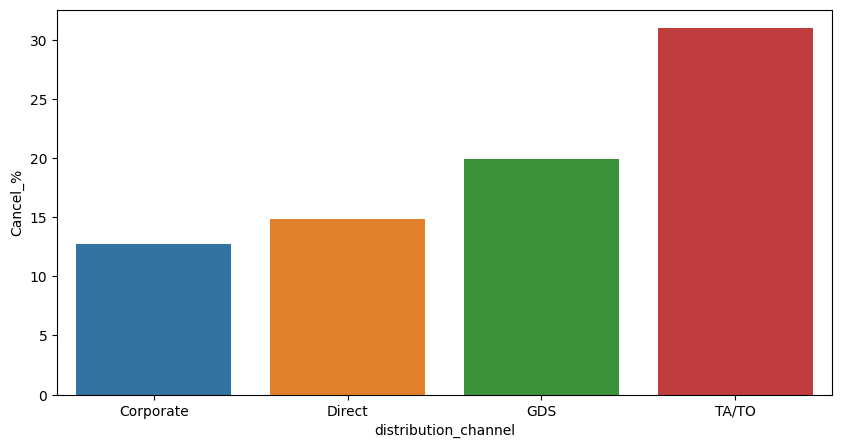

In [ ]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()


TA/TO has the highest cancellation rate .
Lets check the reason for this much cancellation .

In [ ]:
waiting_bookings = df[df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time

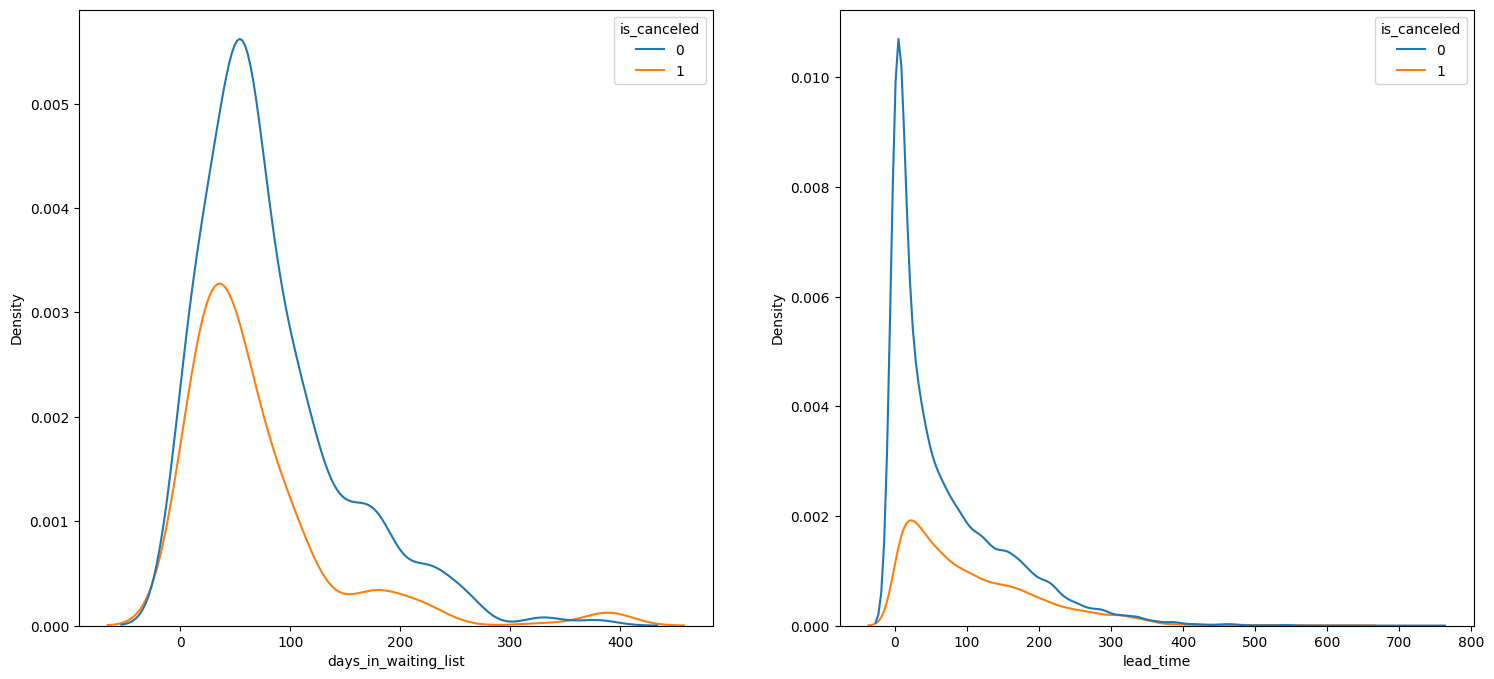

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df['lead_time'], hue = df['is_canceled'])
plt.show()

Above data shows that waiting period does not have affect on cancellation .

which month has the highest revanue?

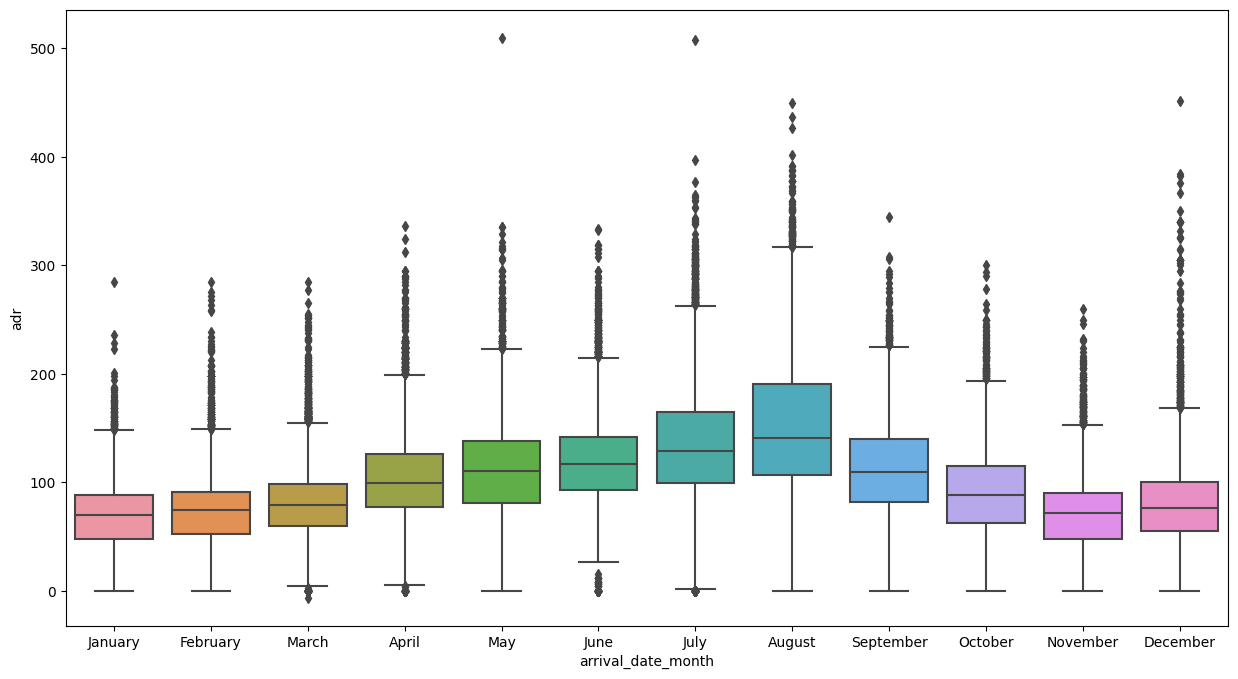

In [ ]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = df['arrival_date_month'],y = df1['adr'])
plt.show()

revanue increase in first half of the year , August has the highest revanue then it decreases in second half but makes decent revanue at the end of the year.

Revenue generated in last 3 years.

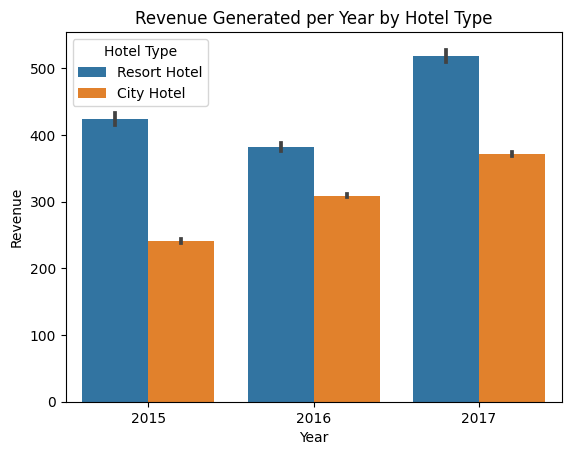

In [ ]:


df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])

# Replace NaN values in 'arrival_date_year' column with a default value (e.g., 0)
df['arrival_date_year'].fillna(0, inplace=True)

sns.barplot(data=df, x='arrival_date_year', y='revenue', hue='hotel')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue Generated per Year by Hotel Type')
plt.legend(title='Hotel Type')
plt.show()


As we can see in above bar chart each year City Hotel generates the highest revanue.
Highest revanue generated in 2017 .

##Conclusion
### On the basis of above analysis these conclusion are made:

1. Most demanding room type is 'A'.
2. Agent '9' makes the highest bookings.
3. Most people visits hotel from Portugal, Great Britain and France.
4. City Hotel has higher booking %, revanue, waiting time, cancellation rate then Resort Hotel.
5. City hotel is more preferred for short time period but for long time periiod Resort Hotel is highly preferred because of less adr.
6. Returning rate of customer at Resort Hotel is higher then City Hotel.
7. TA/TO are mostly used Distribution channel.
8. GDS makes the highest revanue but DIrect and TA/To are very close.
9. Monthly revanue : in first half of year revanue increases and at peak on August then downfall starts but at the end of year it gets some great deals.
10. 2017 makes the highest revanue in last three years.




###Breif:  
##### City hotel is great at making revanue, highly occupied most preferrred for short time period but has high waiting time,and almost 30% cancellation rate too.
#####On the other hand Resort Hotel is making decent revanue low waiting time, gives great deal on long time period stay with low adr which is  benificial for customers.